# HCG Kitchenware Sales & Profitability Analysis

Author: Rebecca Shih

Objective: To analyze sales, profit, and store performance for HCG Kitchenware to identify key trends and growth opportunities.

In [10]:
import pandas as pd

df = pd.read_csv("/Users/becca/hcg_sales_sample.csv", parse_dates=["order_date"])
df.head()

,order_id,order_date,store_name,product_name,category,quantity,unit_price,sales_amount,cost_amount,profit
0,10000,2024-04-12,Downtown Showroom,Water Heater,Appliance,3,860.51,"2,581.53","1,560.00","1,021.53"
1,10001,2025-03-11,Suburban Outlet,Gas Stove,Appliance,4,644.92,"2,579.68","1,520.00","1,059.68"
2,10002,2024-09-27,Downtown Showroom,Gas Stove,Appliance,3,589.16,"1,767.48","1,140.00",627.48
3,10003,2024-04-16,Downtown Showroom,Stainless Sink,Kitchen,4,261.54,"1,046.16",560.00,486.16
4,10004,2024-03-12,Downtown Showroom,Stainless Sink,Kitchen,6,259.60,"1,557.60",840.00,717.60


## 1. Import Libraries & Load Data

In [11]:
# Import essential Python libraries for data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Display settings for better readability
pd.set_option('display.float_format', '{:,.2f}'.format)

# Load the dataset
df = pd.read_csv("/Users/becca/hcg_sales_sample.csv", parse_dates=["order_date"])
print("✅ Data loaded successfully! Shape:", df.shape)

# Display first few rows
df.head()

✅ Data loaded successfully! Shape: (2000, 10)


,order_id,order_date,store_name,product_name,category,quantity,unit_price,sales_amount,cost_amount,profit
0,10000,2024-04-12,Downtown Showroom,Water Heater,Appliance,3,860.51,"2,581.53","1,560.00","1,021.53"
1,10001,2025-03-11,Suburban Outlet,Gas Stove,Appliance,4,644.92,"2,579.68","1,520.00","1,059.68"
2,10002,2024-09-27,Downtown Showroom,Gas Stove,Appliance,3,589.16,"1,767.48","1,140.00",627.48
3,10003,2024-04-16,Downtown Showroom,Stainless Sink,Kitchen,4,261.54,"1,046.16",560.00,486.16
4,10004,2024-03-12,Downtown Showroom,Stainless Sink,Kitchen,6,259.60,"1,557.60",840.00,717.60


This dataset contains order-level information from HCG Kitchenware’s retail and online sales.
Each row represents one transaction, including product details, sales amount, and profit.

## 2. Data Overview & Cleaning

In [12]:
# Check structure and data types
df.info()

# Summary statistics for numerical columns
df.describe()

# Check for missing values
df.isnull().sum()

# Sort by date to ensure time-based analysis accuracy
df = df.sort_values("order_date")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      2000 non-null   int64         
 1   order_date    2000 non-null   datetime64[ns]
 2   store_name    2000 non-null   object        
 3   product_name  2000 non-null   object        
 4   category      2000 non-null   object        
 5   quantity      2000 non-null   int64         
 6   unit_price    2000 non-null   float64       
 7   sales_amount  2000 non-null   float64       
 8   cost_amount   2000 non-null   float64       
 9   profit        2000 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 156.4+ KB


Before analyzing, it’s important to confirm data quality — make sure there are no missing or inconsistent values,
and ensure that the time field (`order_date`) is correctly formatted for trend analysis.

## 3. Sales Trend Analysis

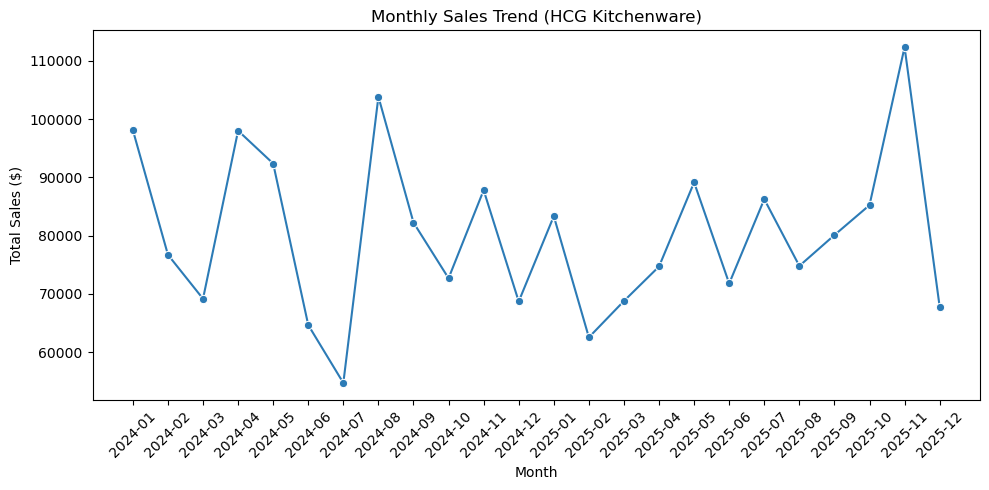

In [13]:
# Extract month-year for time grouping
df["year_month"] = df["order_date"].dt.to_period("M").astype(str)
monthly = df.groupby("year_month")["sales_amount"].sum().reset_index()

# Plot monthly sales trend
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly, x="year_month", y="sales_amount", marker="o", color="#2C7BB6")
plt.title("Monthly Sales Trend (HCG Kitchenware)")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This chart reveals the overall sales trend across months.
A consistent upward trend may indicate brand growth, while dips can show seasonal slowdowns or external factors (e.g., holidays, promotions).

## 4. Product & Profit Analysis

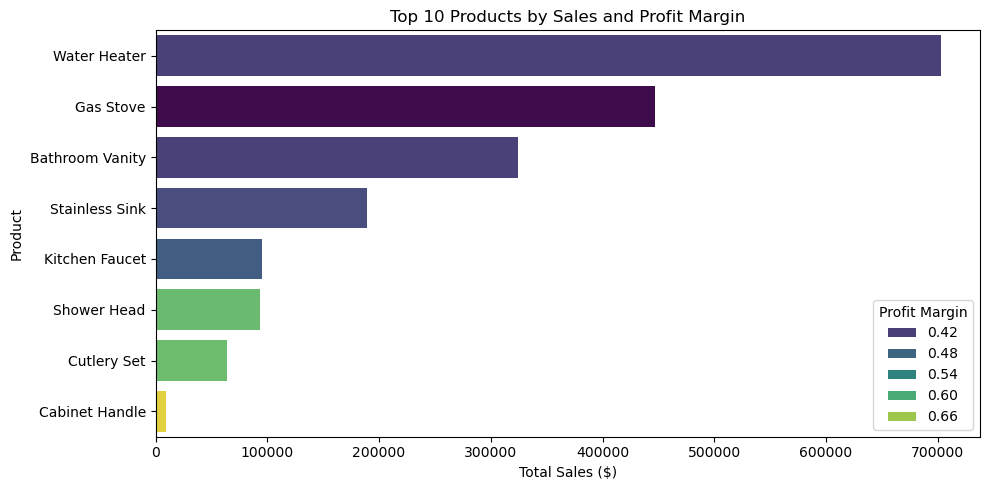

In [14]:
product_perf = df.groupby("product_name").agg(
    total_sales=("sales_amount", "sum"),
    total_cost=("cost_amount", "sum"),
    total_profit=("profit", "sum"),
    avg_unit_price=("unit_price", "mean"),
    quantity_sold=("quantity", "sum")
).reset_index()

# Calculate profit margin
product_perf["profit_margin"] = product_perf["total_profit"] / product_perf["total_sales"]

# Top 10 products by sales
top_products = product_perf.sort_values("total_sales", ascending=False).head(10)

# Visualization
plt.figure(figsize=(10,5))
sns.barplot(data=top_products, x="total_sales", y="product_name", hue="profit_margin", dodge=False, palette="viridis")
plt.title("Top 10 Products by Sales and Profit Margin")
plt.xlabel("Total Sales ($)")
plt.ylabel("Product")
plt.legend(title="Profit Margin", loc="lower right")
plt.tight_layout()
plt.show()

High sales products such as Kitchen Faucet and Gas Stove drive total revenue,
but analyzing profit margin helps distinguish between high-volume and high-profit items.
This is crucial for identifying which products truly drive business value.

## 5. Store Performance — Comparing Sales Channels

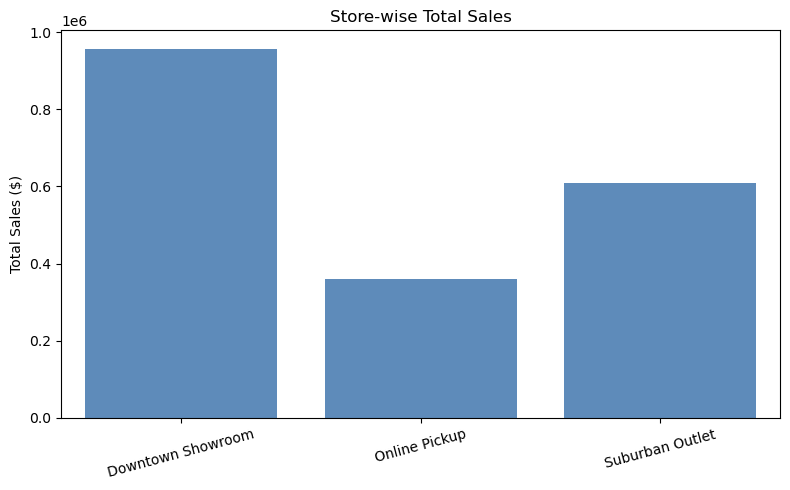

,store_name,total_sales,total_profit,avg_profit_margin
0,Downtown Showroom,"957,497.23","412,516.23",0.43
1,Online Pickup,"360,436.67","157,045.17",0.44
2,Suburban Outlet,"607,999.33","262,396.83",0.43


In [17]:
store_perf = df.groupby("store_name").agg(
    total_sales=("sales_amount", "sum"),
    total_profit=("profit", "sum"),
    avg_profit_margin=("profit", lambda x: x.sum() / df.loc[x.index, "sales_amount"].sum())
).reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=store_perf, x="store_name", y="total_sales", color="#4F8BC9")
plt.title("Store-wise Total Sales")
plt.xlabel("")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

store_perf

Comparing store-level performance shows which channels (e.g., Downtown Showroom, Suburban Outlet, Online Pickup)
contribute most to revenue and profitability.
This can inform inventory allocation and marketing investment.

## 6. SQL Query Example — Analytical Queries

In [18]:
# Create an in-memory SQLite database for SQL queries
conn = sqlite3.connect(":memory:")
df.to_sql("sales", conn, index=False, if_exists="replace")

# Example query: Top 10 products by total sales
query = """
SELECT product_name,
       SUM(quantity) AS total_qty,
       SUM(sales_amount) AS total_sales,
       SUM(profit) AS total_profit
FROM sales
GROUP BY product_name
ORDER BY total_sales DESC
LIMIT 10;
"""
pd.read_sql(query, conn)

,product_name,total_qty,total_sales,total_profit
0,Water Heater,779,"702,552.84","297,472.84"
1,Gas Stove,744,"447,185.84","164,465.84"
2,Bathroom Vanity,720,"324,528.04","137,328.04"
3,Stainless Sink,758,"189,647.24","83,527.24"
4,Kitchen Faucet,635,"95,271.40","44,471.40"
5,Shower Head,785,"93,484.80","58,159.80"
6,Cutlery Set,800,"63,920.15","39,920.15"
7,Cabinet Handle,780,"9,342.92","6,612.92"


Integrating SQL within the notebook helps demonstrate data querying and database manipulation skills,
which is valuable for analytics and business intelligence roles.

## 7. Insights & Recommendations — Business Takeaways

### 🔍 Key Insights
- **Kitchen Faucet** and **Gas Stove** are the top-selling products.
- **Accessories** category has high margins but low sales volume.
- **April–June** is the peak sales period (seasonal demand).
- **Suburban Outlet** shows higher profit margin than other stores.

### 💡 Recommendations
1. Launch promotional campaigns for high-margin products during slow months.
2. Improve inventory planning for high-demand items like **Gas Stove**.
3. Strengthen the **Online Pickup** channel to increase convenience and order value.
4. Use regional data to optimize marketing and pricing strategy.